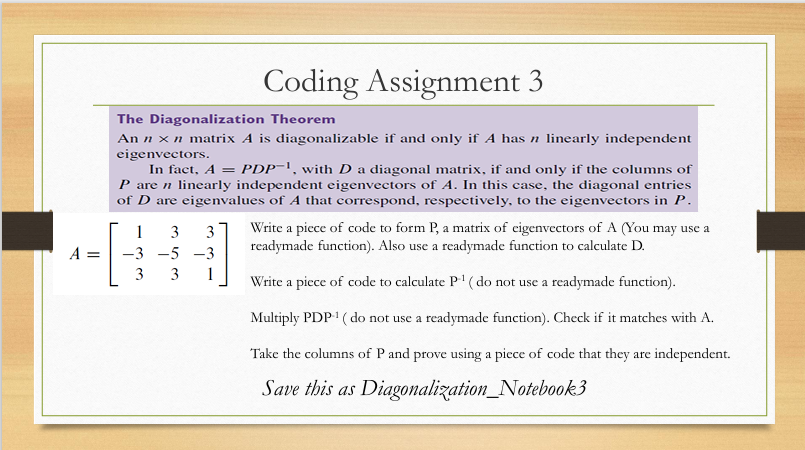

## **Write a piece of code to form P, a matrix of eigenvectors of A (You may use a readymade function). Also use a readymade function to calculate D**

#### Importing library

In [12]:
import sympy as sp

In [18]:
# Define the matrix A
A = sp.Matrix([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])

# 1. Form P (matrix of eigenvectors) and D (diagonal matrix)
P, D = A.diagonalize()
print("A Matrix ")
print(A)
print("\nP (Matrix of Eigenvectors):")
print(P)
print("\nD (Diagonal Matrix):")
print(D)

A Matrix 
Matrix([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])

P (Matrix of Eigenvectors):
Matrix([[-1, -1, 1], [1, 0, -1], [0, 1, 1]])

D (Diagonal Matrix):
Matrix([[-2, 0, 0], [0, -2, 0], [0, 0, 1]])


## **Write a piece of code to calculate P^-1 (do not use readymade function)**

#### Defining matrix_inverse_rref function to clacullate inverse using reduced row echelon form

- The function first checks if the input matrix is a sympy.Matrix. If not, it converts it to a sympy.Matrix.
- It then augments the input matrix with the identity matrix of the same size using matrix.row_join(sp.eye(n)).
- Gaussian elimination is performed on the augmented matrix to obtain the reduced row echelon form (rref) using augmented_matrix.rref()[0].
- The function checks if the matrix is invertible by comparing the left part of the rref form (corresponding to the original matrix) with the zero matrix sp.Matrix.zeros(n, n). If they are equal, the matrix is not invertible, and the function returns None.
- If the matrix is invertible, the inverse matrix is extracted from the right part of the rref form (corresponding to the identity matrix).
- The inverse matrix is returned.

In [19]:
def matrix_inverse_rref(matrix):
    """
    Calculate the inverse of a matrix using the reduced row echelon form (rref) method.

    Args:
        matrix (sympy.Matrix): The input matrix.

    Returns:
        sympy.Matrix: The inverse of the input matrix, or None if the matrix is not invertible.
    """
    # Convert the input matrix to a sympy Matrix if necessary
    if not isinstance(matrix, sp.Matrix):
        matrix = sp.Matrix(matrix)

    # Concatenate the input matrix with the identity matrix
    n = matrix.shape[0]  # Get the number of rows/columns
    augmented_matrix = matrix.row_join(sp.eye(n))

    # Perform Gaussian elimination to obtain the reduced row echelon form
    rref_form = augmented_matrix.rref()[0]

    # Check if the matrix is invertible
    if rref_form[:n, :n] == sp.Matrix.zeros(n, n):
        print("The matrix is not invertible.")
        return None

    # Extract the inverse matrix from the rref form
    inverse_matrix = rref_form[:, n:]

    return inverse_matrix

#### Calculating P^-1 (inverse of P)

In [21]:
P_inverse = matrix_inverse_rref(P)
print("\nP^-1 (Inverse of P):")
print(P_inverse)


P^-1 (Inverse of P):
Matrix([[1, 2, 1], [-1, -1, 0], [1, 1, 1]])


 ## **Multiply PDP-1 (do not use a readymade function). Check if it matches with A**

In [24]:
def matrix_multiply(A, B):
    """
    Multiply two matrices A and B manually.

    Args:
        A (sympy.Matrix): The first matrix.
        B (sympy.Matrix): The second matrix.

    Returns:
        sympy.Matrix: The product of the two matrices.
    """
    # Get the dimensions of the matrices
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape

    # Check if the matrices are compatible for multiplication
    if cols_A != rows_B:
        raise ValueError("Matrices are not compatible for multiplication")

    # Create a new matrix to store the result
    result = sp.zeros(rows_A, cols_B)

    # Perform matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i, j] += A[i, k] * B[k, j]

    return result



In [26]:
print("\nPDP^-1:")
PDP_inverse = matrix_multiply(matrix_multiply(P, D), P_inverse)
print(PDP_inverse)

# Check if PDP^-1 matches with A
print("\nDoes PDP^-1 match with A?")
print("\nPDP^-1: ")
print(PDP_inverse)
print("\nA: ")
print(A)
if PDP_inverse == A:
 print("PDP^-1 equal to matrix A")
else:
 print("PDP^-1 not equal to A")


PDP^-1:
Matrix([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])

Does PDP^-1 match with A?

PDP^-1: 
Matrix([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])

A: 
Matrix([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])
PDP^-1 equal to matrix A


## **Take the columns of P and prove using a piece of code that they are independent.**

In [28]:
#  Prove that the columns of P are linearly independent
print("\nProving that the columns of P are linearly independent...")

rref_matrix, pivot_columns = P.rref()
print("\nReduced Row Echolon form of the matrix P is")
print(rref_matrix)

# Calculating no of pivot columns in the rref of matrix
print("\nPivot columns are ", pivot_columns)
n = len(pivot_columns)
print("\nNo of non-zero rows in rref of matrix P :", n)

rn = P.rows

if (rn == n):
    print("\nThe basis in the matrix P are linearly independent")
else:
    print("The basis in the matrix P are not linearly independent")


Proving that the columns of P are linearly independent...

Reduced Row Echolon form of the matrix P is
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

Pivot columns are  (0, 1, 2)

No of non-zero rows in rref of matrix P : 3

The basis in the matrix P are linearly independent


- It calculates the reduced row echelon form (rref) of the matrix P using P.rref(). This returns the rref matrix and the pivot columns.
- The rref matrix and the pivot columns are printed.
- The number of pivot columns (n) is calculated as the length of the pivot_columns list.
- The number of non-zero rows in the rref matrix (n) is printed.
- The number of rows in the original matrix P (rn) is obtained using P.rows.
- If the number of non-zero rows in the rref matrix (n) is equal to the number of rows in the original matrix P (rn), it means that the columns of P are linearly independent. Otherwise, they are not linearly independent. 